**Question**: Build, compile, train and evaluate multilayer perceptron model to address two circles problem using SGD as optimizer and loss as binary cross entropy.

**Description :** Develop a Multilayer Perceptron model to address the two circles problem.

#generate 2d classification dataset with

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

* Split the model by using training and testing

* Build the model by using the Sequential model and adding the first activation as tanh layer having 5 neurons and the second activation function as a sigmoid layer having 1 neuron

* Compile the model by using SGD optimizer and loss has binary_cross entropy

* Fit or train the model by using with training, validation data, 500 Epochs, and 0 verbose

* Plot the model with train and test values


**Level :** Hard

**Input format :** 

Dataset

**Output format :**

Model accuracy and visualization

**Sample Input :**

Load given data

**Sample Output :**

Train: 0.814, Test: 0.816

Train: 0.812, Test: 0.844


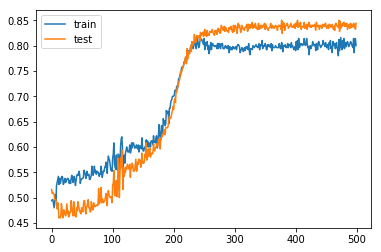

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomUniform
from matplotlib import pyplot
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = tf.keras.Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(tf.keras.layers.Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

